In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


%matplotlib inline

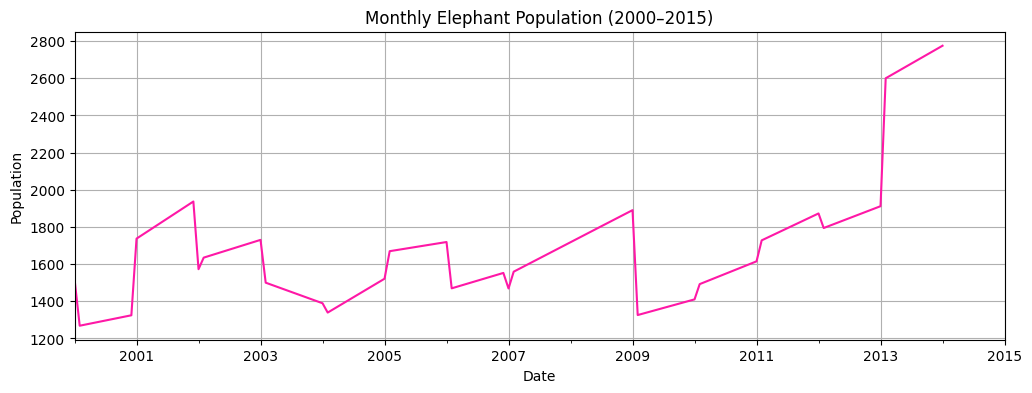

In [41]:
pop = pd.read_csv("../data/processed/elephant_population_monthly.csv", index_col=0, parse_dates=True)
pop = pop["2000":"2015"]  
pop = pop.squeeze()

pop.plot(title="Monthly Elephant Population (2000–2015)",  color="#fe18a6",figsize=(12, 4))
plt.ylabel("Population")
plt.grid(True)
plt.show()

In [42]:
result = adfuller(pop.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -0.2572586341599189
p-value: 0.9313434348312293


In [43]:
pop_diff = pop.diff().dropna()

result_diff = adfuller(pop_diff)
print("ADF Statistic (after diff):", result_diff[0])
print("p-value:", result_diff[1])


ADF Statistic (after diff): -13.270976477171176
p-value: 8.038773028641255e-25


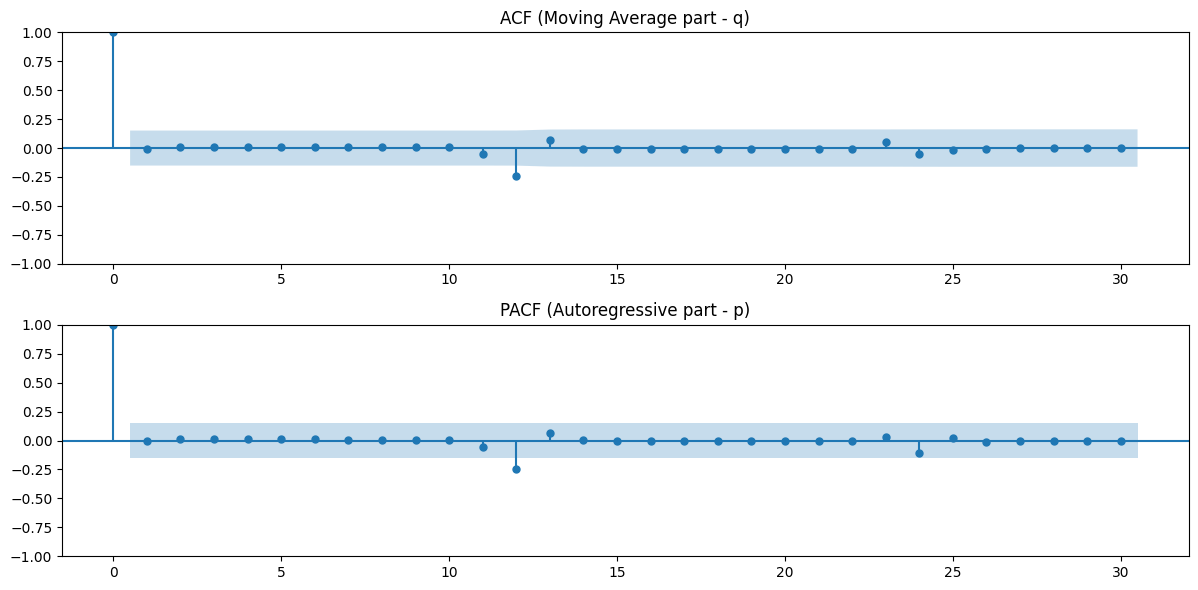

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

sm.graphics.tsa.plot_acf(pop_diff, lags=30, ax=ax[0])
ax[0].set_title("ACF (Moving Average part - q)")

sm.graphics.tsa.plot_pacf(pop_diff, lags=30, ax=ax[1])
ax[1].set_title("PACF (Autoregressive part - p)")

plt.tight_layout()
plt.show()

In [45]:
pop_clean = pop.dropna()

auto_model = pm.auto_arima(pop_clean, seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())

c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\ut

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2000.046, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1992.087, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1994.072, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1994.073, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1991.244, Time=0.02 sec


c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1996.065, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.487 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -994.622
Date:                Fri, 27 Jun 2025   AIC                           1991.244
Time:                        20:56:46   BIC                           1994.368
Sample:                    01-01-2000   HQIC                          1992.512
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8126.3179    216.295     37.570      0.000    7702.387 

In [46]:
n_periods = 12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [47]:
last_date = pop_clean.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

In [48]:
forecast_series = pd.Series(forecast, index=future_dates)
conf_df = pd.DataFrame(conf_int, index=future_dates, columns=['Lower', 'Upper'])

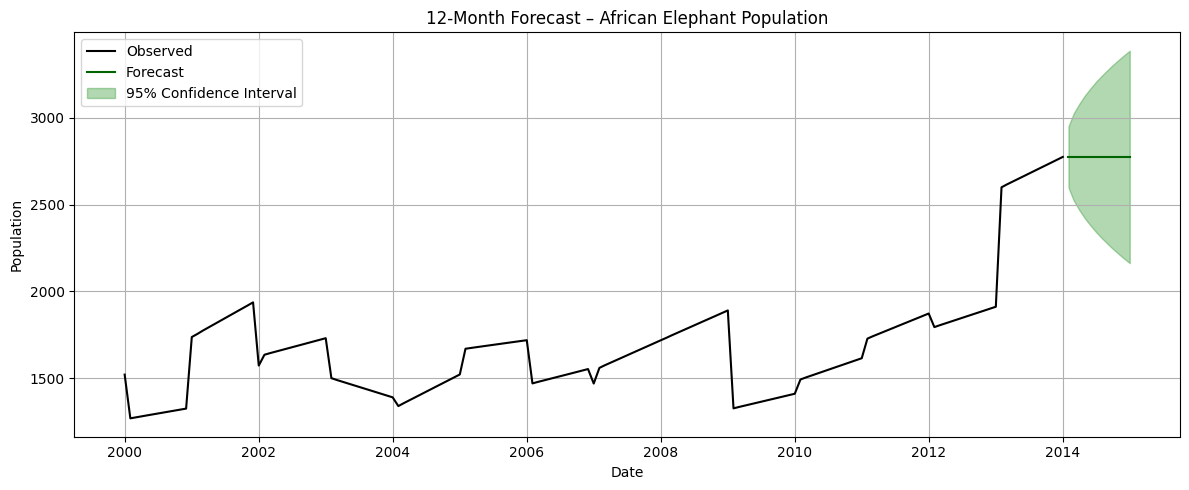

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(pop_clean, label="Observed", color="black")
plt.plot(forecast_series, label="Forecast", color="darkgreen")
plt.fill_between(conf_df.index, conf_df["Lower"], conf_df["Upper"], color="green", alpha=0.3, label="95% Confidence Interval")

plt.title("12-Month Forecast – African Elephant Population")
plt.xlabel("Date")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nourg\Documents\VS code\species_forecast\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\User

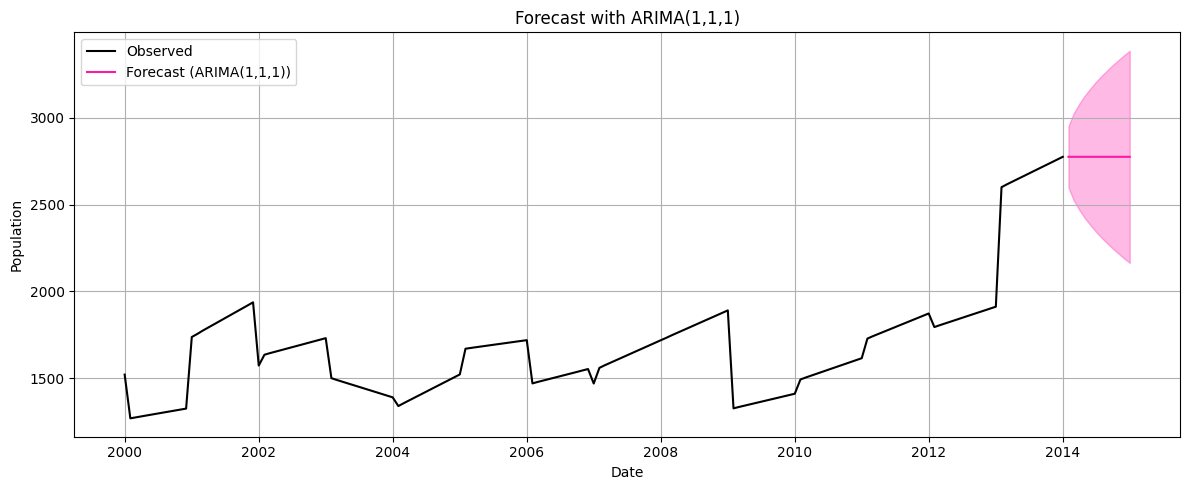

<Figure size 640x480 with 0 Axes>

In [ ]:
model = ARIMA(pop_clean, order=(1, 1, 1))
fitted_model = model.fit()

forecast_obj = fitted_model.get_forecast(steps=12)
forecast_mean = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

future_dates = pd.date_range(start=pop_clean.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

plt.figure(figsize=(12, 5))
plt.plot(pop_clean, label="Observed", color="black")
plt.plot(future_dates, forecast_mean, label="Forecast (ARIMA(1,1,1))", color="#fe18a6")
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="#fe18a6", alpha=0.3)
plt.title("Forecast with ARIMA(1,1,1)")
plt.xlabel("Date")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
